<ipython-input-16-184cfbd8524e>:13: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')


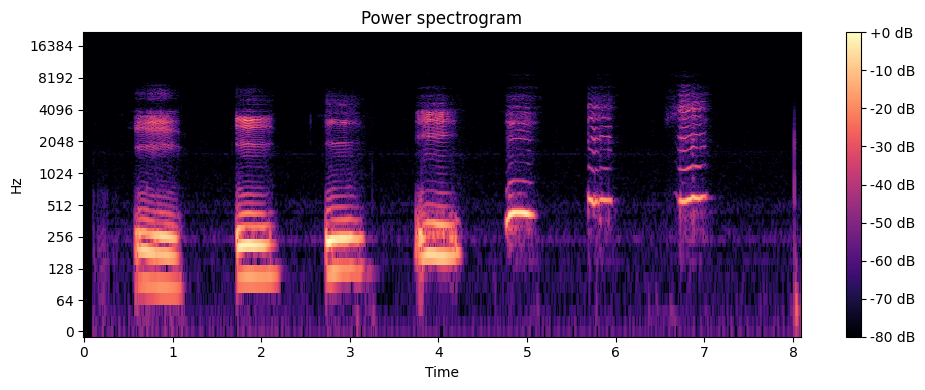

In [16]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/И.wav'
signal, sr = librosa.load(file_path, sr=None)

D = librosa.stft(signal, window='hann')

frequencies = librosa.fft_frequencies(sr=sr)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

plt.savefig('spectrogram.png')

In [17]:
audio_path = "/content/И.wav"
audio, sr = librosa.load(audio_path, sr=None)

spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio, hop_length=512, window='hann')), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.savefig('spectrogram.png')
plt.close()

frequencies = librosa.fft_frequencies(sr=sr)
min_frequency = frequencies[1]  
max_frequency = frequencies[-1]

print("Минимальная частота голоса:", min_frequency)
print("Максимальная частота голоса:", max_frequency)

Минимальная частота голоса: 21.533203125
Максимальная частота голоса: 22050.0


In [46]:
from scipy import signal

audio_path = "/content/И.wav"
audio, sr = librosa.load(audio_path, sr=None)

stft = np.abs(librosa.stft(audio))

energy = np.sum(stft, axis=0)
formants = []
num_formants = 3

for _ in range(num_formants):
    max_energy_index = np.argmax(energy)
    formants.append(librosa.fft_frequencies(sr=2208)[max_energy_index])
    
    formant_range = range(max_energy_index - 30, max_energy_index + 30)
    energy[formant_range] = 0

print("Три самые сильные форманты:", formants)

window_type = 'hann'
window_size = 512
overlap_ratio = 0.5

samples, sample_rate = librosa.load(audio_path, sr=None)

frequencies, _, spectrogram = signal.spectrogram(samples, sample_rate, window=window_type, nperseg=window_size, noverlap=int(window_size * overlap_ratio))

energy_per_frequency = np.sum(spectrogram, axis=1)  
main_tonal_index = np.argmax(energy_per_frequency)  
main_tonal_frequency = frequencies[main_tonal_index]

step_size = frequencies[2] - frequencies[1]  

print("Наиболее тембрально окрашенный основной тон: {:.2f} Гц".format(main_tonal_frequency))
print("Шаг по частоте: {:.2f} Гц".format(step_size))

Три самые сильные форманты: [171.421875, 84.09375, 258.75]
Наиболее тембрально окрашенный основной тон: 258.40 Гц
Шаг по частоте: 86.13 Гц


In [53]:
from scipy import signal

audio_path = "/content/И.wav"
audio, sr = librosa.load(audio_path, sr=None)

stft = np.abs(librosa.stft(audio))

energy = np.sum(stft, axis=0)
formants = []
num_formants = 3

for _ in range(num_formants):
    max_energy_index = np.argmax(energy)
    formants.append(librosa.fft_frequencies(sr=1000)[max_energy_index])

    formant_range = range(max_energy_index - 30, max_energy_index + 30)
    energy[formant_range] = 0

print("Три самые сильные форманты:", formants)

window_type = 'hann'
window_size = 512
overlap_ratio = 0.5

samples, sample_rate = librosa.load(audio_path, sr=10000)

frequencies, _, spectrogram = signal.spectrogram(samples, sample_rate, window=window_type, nperseg=window_size, noverlap=int(window_size * overlap_ratio))

energy_per_frequency = np.sum(spectrogram, axis=1)
formant_start_index = np.argmin(np.abs(frequencies - min(formants)))  
formant_end_index = np.argmin(np.abs(frequencies - max(formants)))  

main_tonal_index = formant_start_index + np.argmax(energy_per_frequency[formant_start_index:formant_end_index+1])  

step_size = sample_rate / window_size  

print("Наиболее тембрально окрашенный основной тон: {:.2f} Гц".format(main_tonal_frequency))
print("Шаг по частоте: {:.2f} Гц".format(step_size))

Три самые сильные форманты: [77.63671875, 38.0859375, 117.1875]
Наиболее тембрально окрашенный основной тон: 117.19 Гц
Шаг по частоте: 19.53 Гц
